## Using ML models for prediction

In [1]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [2]:
df = pd.read_csv('Stationary_Data.csv')
df = df.set_index('Date',drop=True)
df.drop('quarter :After_Differencing', axis=1, inplace=True)
df.head(3)

,realgdp :After_Differencing,realcons :After_Differencing,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
Date,,,,,,,,,,,,
1971-07-01,-71.765,-8.2,-45.594,-1.297,-36.1,0.03,-3.2,0.48,0.9,0.143,-1.94,-0.39
1971-10-01,13.029,-16.2,31.763,-17.167,18.2,-0.18,0.7,-0.23,0.1,-0.098,-2.87,2.62
1972-01-01,52.779,14.9,22.236,-14.645,9.3,0.15,0.1,-1.34,-0.7,-0.108,4.51,-5.84


In [3]:
x = df.drop(['realgdp :After_Differencing'],axis=1)
#X = df.drop(['target','flower_name'], axis='columns')
y = df['realgdp :After_Differencing']

### Dividing data into Training and Testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

## Model_1 : Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [6]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [7]:
lin_model.score(X_test,y_test)

0.6827141065909518

In [8]:
pred_lin = lin_model.predict(X_test)

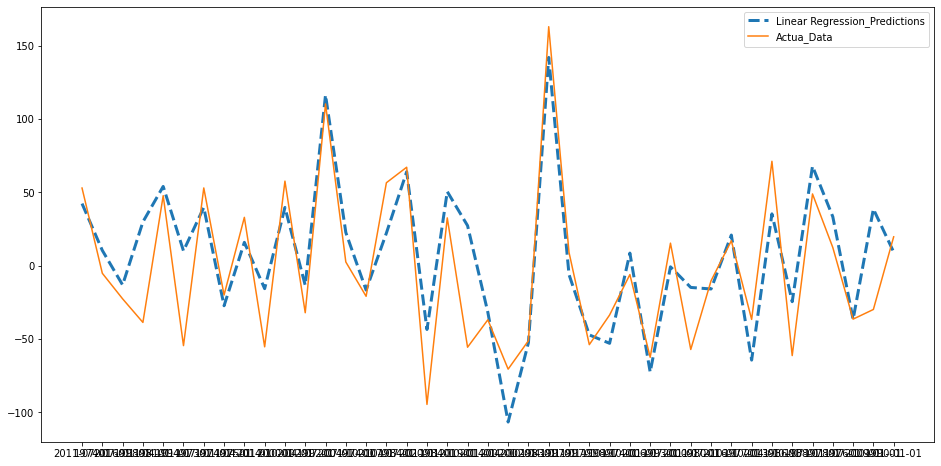

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure (figsize= (16,8))
plt.plot(pred_lin,label='Linear Regression_Predictions',ls='--', linewidth=3,)
plt.plot(y_test,label='Actua_Data')
plt.legend()
plt.show()

# Model_2 : Random Forest Regressor

## Selecting best parameter for Random Forest Regressor

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Random Forest
model_params = {

    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            #'criterion' : ["gini", "entropy"],
            'n_estimators': [15,30,60,95,150,300,500],
            'random_state':[0,5,10,20,30,50,100,150],
        }
    },
   
}

In [13]:
scores = []
import warnings
warnings.filterwarnings('ignore')
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    warnings.filterwarnings('ignore')
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
                    })
    
dff1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
dff1

,model,best_score,best_params
0,random_forest,0.652077,"{'n_estimators': 300, 'random_state': 5}"


In [14]:
final_Model_RF =  RandomForestRegressor(n_estimators=300 ,random_state=5)
final_Model_RF.fit(X_train,y_train)
pred_RF = final_Model_RF.predict(X_test)

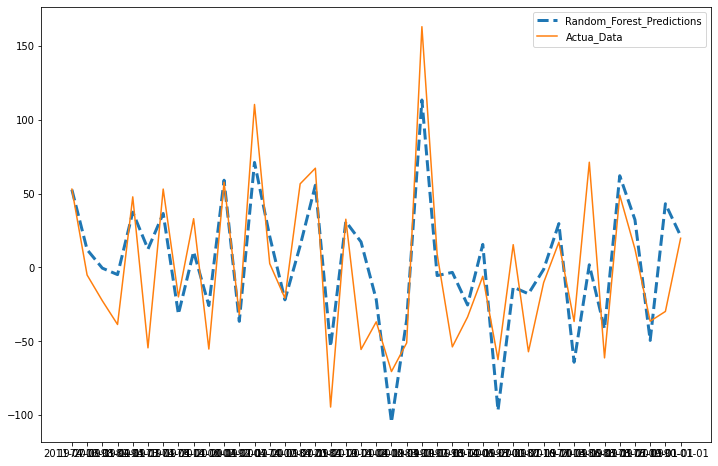

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure (figsize= (12,8))
plt.plot(pred_RF,label='Random_Forest_Predictions',ls='--', linewidth=3,)
plt.plot(y_test,label='Actua_Data')
plt.legend()
plt.show()